Workflow for Getting Coordinates

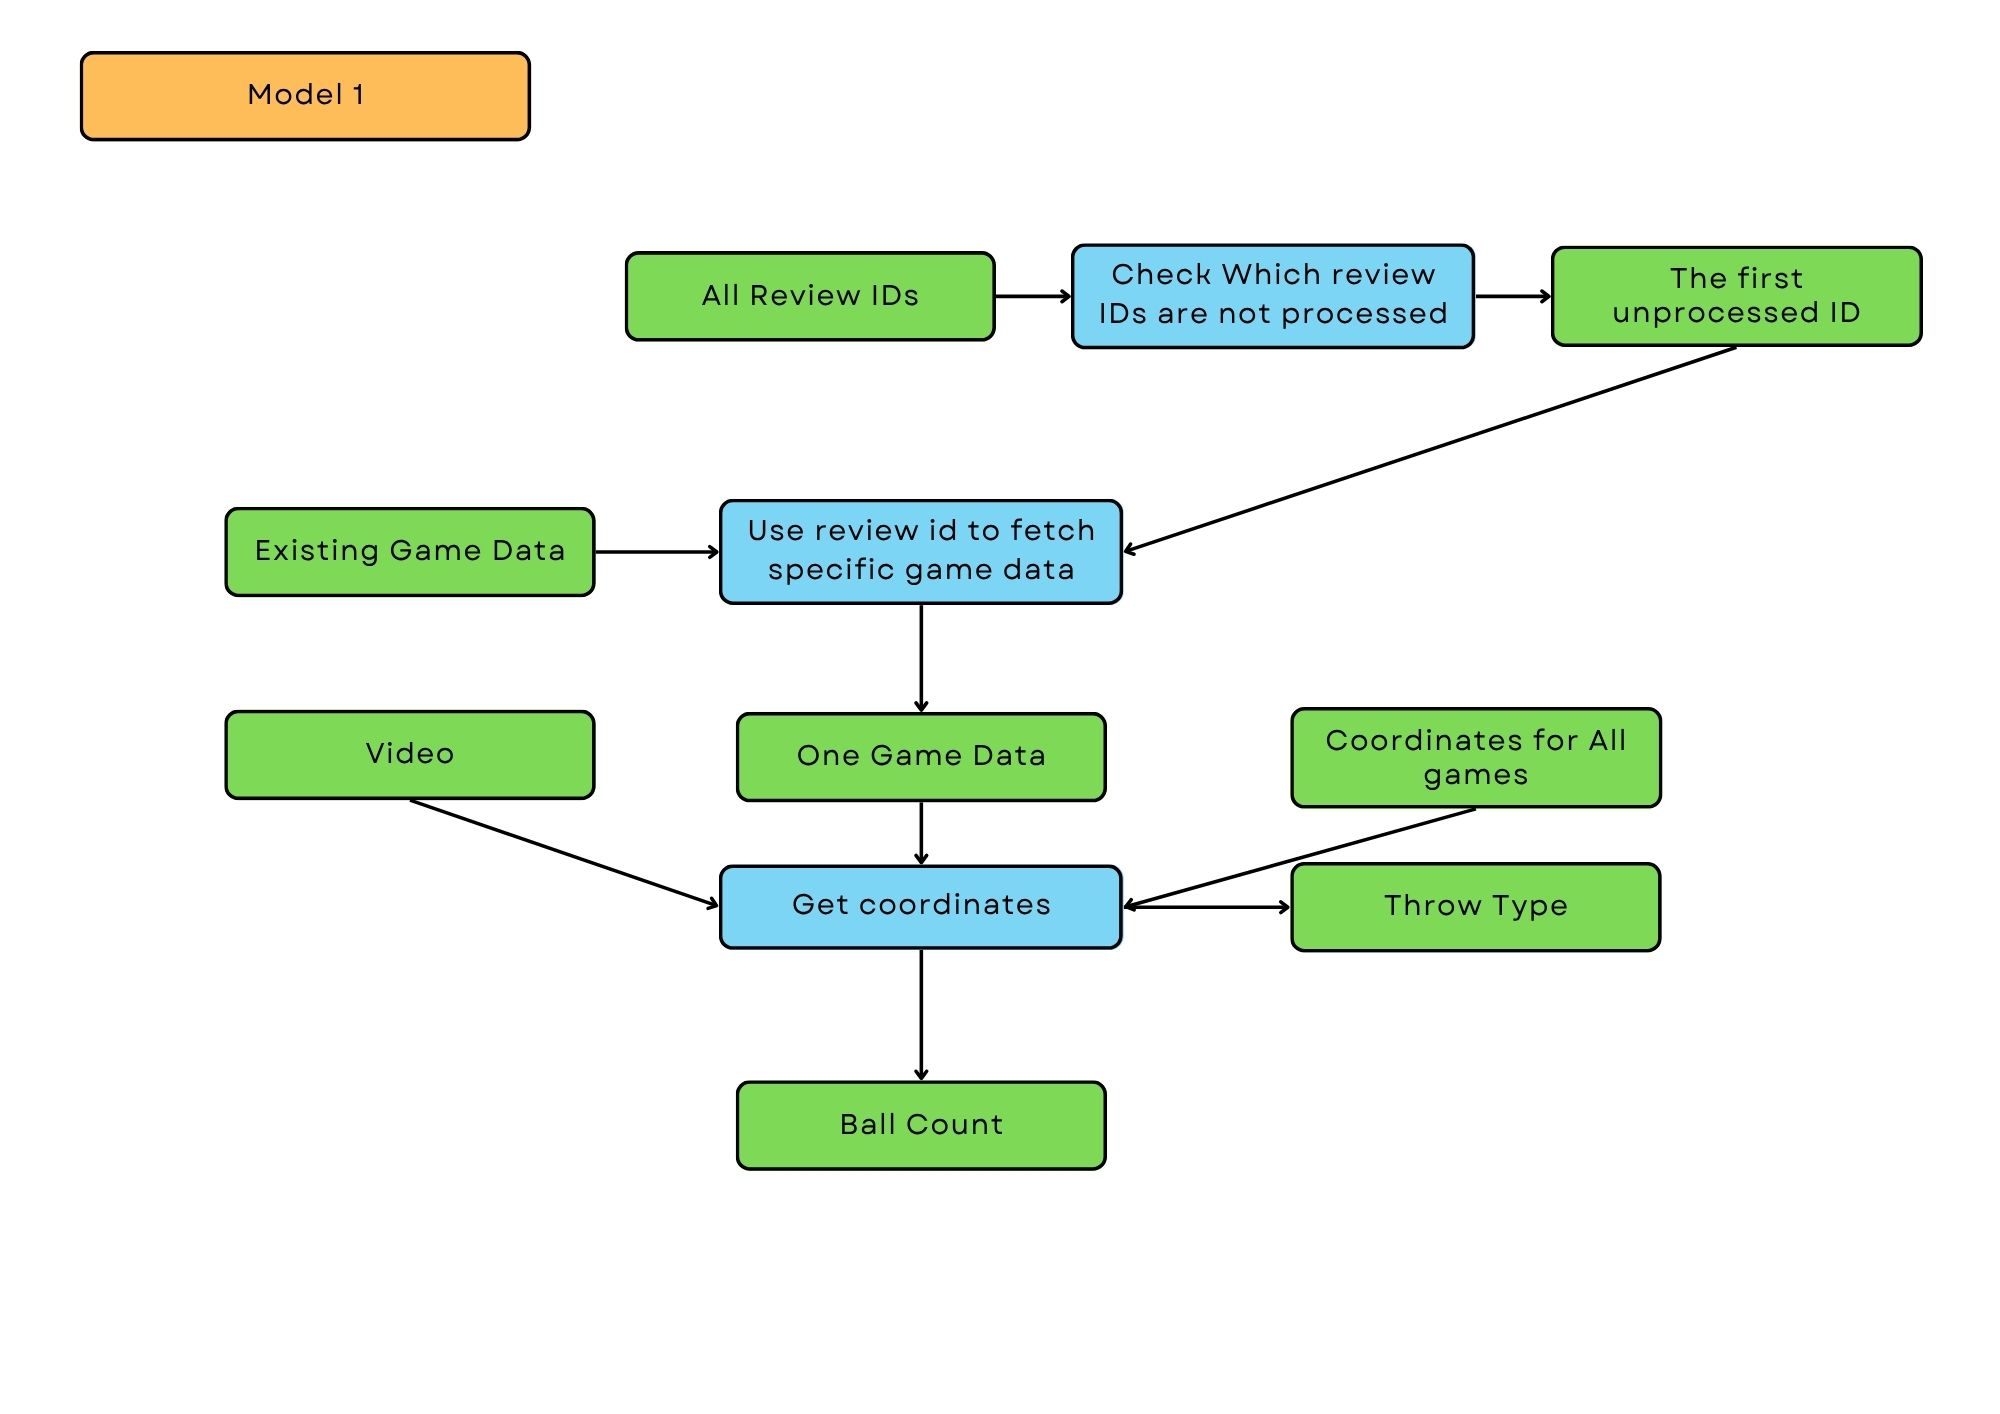

1. Check the Review IDs that are still unprocessed in Google drive (by accessing the file names), if the game is processed, there will be a (ReviewID)Coordinates File in the google drive folder. Generate the first unprocessed game's ID and title

In [ ]:
# --- STEP 0: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

# --- STEP 1: Set folder paths ---
folder_path = '/content/drive/MyDrive/Winrate predictions'
csv_path = os.path.join(folder_path, 'mens_div1_review_ids.csv')

# --- STEP 2: Load the reviewId-title CSV ---
# Reload CSV each run to get latest processing status
df = pd.read_csv(csv_path)

# Get the first unprocessed row
next_row = df[df['processed'] == False].head(1)

if not next_row.empty:
    review_id = str(next_row.iloc[0]['reviewId'])
    title = next_row.iloc[0]['title']
    print(f"Next unprocessed review: {review_id}, Title: {title}")
    missing_review = (review_id, title)
else:
    missing_review = None
    print("✅ All reviews have been processed!")


if missing_review:
    print("First missing file found:")
    print("Review ID:", missing_review[0])
    print("Title:", missing_review[1])
else:
    print("✅ All reviewIds have corresponding _coordinates.xlsx files.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 62 reviewId-title pairs.
First missing file found:
Review ID: 01d7c3a8-0625-4e71-adc1-6420cc0f5390
Title: 2024 NSWDL R8 Mens Div 1: Canterbury Nines vs Kingswood Mavericks


2. Create a folder for every game, this folder will be named (reviewid)_data_files, the first file in this filder will be the single game data.


In [ ]:
# --- STEP 4: Create folder and save single-game data ---
big_data_file = os.path.join(folder_path, 'foam_2024_swapped_throw_first_with_team_counts.xlsx')

# Use the missing_review tuple from the previous block
review_id, title = missing_review

# 1. Create folder for this reviewId
output_folder = os.path.join(folder_path, f"{review_id}_data_files")
os.makedirs(output_folder, exist_ok=True)

# 2. Load the big Excel file
df_big = pd.read_excel(big_data_file)

# 3. Filter rows for this reviewId (assuming first column is reviewId)
df_single_game = df_big[df_big.iloc[:, 0].astype(str) == review_id]

# 4. Save the single game data
output_file = os.path.join(output_folder, f"{review_id}_game_data.xlsx")
df_single_game.to_excel(output_file, index=False)

print(f"✅ Created folder: {output_folder}")
print(f"✅ Saved single game data to: {output_file}")
print(f"Extracted rows: {len(df_single_game)}")


✅ Created folder: /content/drive/MyDrive/Winrate predictions/01d7c3a8-0625-4e71-adc1-6420cc0f5390_data_files
✅ Saved single game data to: /content/drive/MyDrive/Winrate predictions/01d7c3a8-0625-4e71-adc1-6420cc0f5390_data_files/01d7c3a8-0625-4e71-adc1-6420cc0f5390_game_data.xlsx
Extracted rows: 849


3. create throw count column

In [ ]:
# --- STEP 5: Add throw_count column ---
throw_counter = 0
throw_counts = []

for title in df_single_game['title'].astype(str):
    if 'throw' in title.lower():
        throw_counter += 1
        throw_counts.append(throw_counter)
    else:
        throw_counts.append("")

df_single_game['throw_count'] = throw_counts

# ✅ Overwrite the same single-game Excel file
df_single_game.to_excel(output_file, index=False)

print(f"✅ Added throw_count column and overwritten: {output_file}")


✅ Added throw_count column and overwritten: /content/drive/MyDrive/Winrate predictions/01d7c3a8-0625-4e71-adc1-6420cc0f5390_data_files/01d7c3a8-0625-4e71-adc1-6420cc0f5390_game_data.xlsx


/tmp/ipython-input-5-785091671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_game['throw_count'] = throw_counts


4. Get the 8 Coordinates from the coordinates file

In [ ]:
import pandas as pd

# Load Excel
file_path = '/content/drive/MyDrive/Winrate predictions/court_coordinates.xlsx'
df = pd.read_excel(file_path)

# Clean column names (remove whitespace and newlines)
df.columns = df.columns.str.strip().str.replace('\n', '', regex=True)

def get_court_polygons(review_id: str):
    row = df[df['reviewId'] == review_id]
    if row.empty:
        print("Review ID not found.")
        return

    row = row.iloc[0]

    court0 = [
        (row['Court 0-1-top-left-X'], row['Court 0-1-top-left-Y']),
        (row['Court 0-2-top-right-X'], row['Court 0-2-top-right-Y']),
        (row['Court 0-3-bottom-right-X'], row['Court 0-3-bottom-right-Y']),
        (row['Court 0-4-bottom-left-X'], row['Court 0-4-bottom-left-Y'])
    ]

    court1 = [
        (row['Court 1-1-top-left-X'], row['Court 1-1-top-left-Y']),
        (row['Court 1-2-top-right-X'], row['Court 1-2-top-right-Y']),
        (row['Court 1-3-bottom-right-X'], row['Court 1-3-bottom-right-Y']),
        (row['Court 1-4-bottom-left-X'], row['Court 1-4-bottom-left-Y'])
    ]

    print("Court 0 Polygon =", court0)
    print("Court 1 Polygon =", court1)

# Example: Fetch the first non-empty reviewId dynamically
review_id = df['reviewId'].dropna().iloc[0]
get_court_polygons(review_id)


Court 0 Polygon = [(np.float64(597.0), np.float64(492.0)), (np.float64(1262.0), np.float64(512.0)), (np.float64(1761.0), np.float64(985.0)), (np.float64(98.0), np.float64(949.0))]
Court 1 Polygon = [(np.float64(724.0), np.float64(375.0)), (np.float64(1135.0), np.float64(388.0)), (np.float64(1270.0), np.float64(514.0)), (np.float64(594.0), np.float64(497.0))]


5. Fetch the video from google drive, and run yolo to create coordinates

In [ ]:
!pip install ultralytics==8.2.0  # YOLOv8
!pip install opencv-python       # OpenCV
!pip install matplotlib          # Plotting
!pip install pandas openpyxl     # Excel reading/writing
!pip install tqdm                # Progress bar


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from ultralytics import YOLO
import torch
from torch.nn import Sequential
from ultralytics.nn.tasks import DetectionModel
from ultralytics.nn.modules import Conv, C2f, SPPF

# ✅ Allowlist all YOLOv8 model classes used in the .pt file
torch.serialization.add_safe_globals([
    DetectionModel, Sequential, Conv, C2f, SPPF
])


# === PATHS ===
folder_path = '/content/drive/MyDrive/Winrate predictions'
review_id, title = missing_review  # Make sure this is defined from your previous step

# --- Output folder ---
output_folder = os.path.join(folder_path, f"{review_id}_data_files")
os.makedirs(output_folder, exist_ok=True)

# --- Step 1: Load single-game Excel file ---
excel_path = os.path.join(output_folder, f"{review_id}_game_data.xlsx")
df = pd.read_excel(excel_path)
throw_df = df[df['definitionKey'].astype(str).str.lower().str.startswith('throw')].reset_index()

# --- Step 2: Load court coordinates from Excel ---
coord_file = os.path.join(folder_path, "court_coordinates.xlsx")
coord_df = pd.read_excel(coord_file)
coord_df.columns = coord_df.columns.str.strip().str.replace('\n', '', regex=True)

row = coord_df[coord_df['reviewId'] == review_id]
if row.empty:
    raise ValueError(f"Review ID {review_id} not found in court_coordinates.xlsx")
row = row.iloc[0]

# Build court polygons dynamically
court0 = np.array([
    (row['Court 0-1-top-left-X'], row['Court 0-1-top-left-Y']),
    (row['Court 0-2-top-right-X'], row['Court 0-2-top-right-Y']),
    (row['Court 0-3-bottom-right-X'], row['Court 0-3-bottom-right-Y']),
    (row['Court 0-4-bottom-left-X'], row['Court 0-4-bottom-left-Y'])
], dtype=np.int32)

court1 = np.array([
    (row['Court 1-1-top-left-X'], row['Court 1-1-top-left-Y']),
    (row['Court 1-2-top-right-X'], row['Court 1-2-top-right-Y']),
    (row['Court 1-3-bottom-right-X'], row['Court 1-3-bottom-right-Y']),
    (row['Court 1-4-bottom-left-X'], row['Court 1-4-bottom-left-Y'])
], dtype=np.int32)

print("Court 0 Polygon:", court0.tolist())
print("Court 1 Polygon:", court1.tolist())

# --- Step 3: Perspective transforms ---
court_width, court_height = 900, 1800
t0_dst_square = np.array([[0,900],[900,900],[900,1800],[0,1800]], dtype=np.float32)
t1_dst_square = np.array([[0,0],[900,0],[900,900],[0,900]], dtype=np.float32)

H0 = cv2.getPerspectiveTransform(court0.astype(np.float32), t0_dst_square)
H1 = cv2.getPerspectiveTransform(court1.astype(np.float32), t1_dst_square)

# --- Step 4: Locate video automatically ---
video_candidates = [f for f in os.listdir(folder_path) if f.startswith(review_id) and f.endswith('.mp4')]
if not video_candidates:
    raise FileNotFoundError(f"No video found for reviewId {review_id}")
video_path = os.path.join(folder_path, video_candidates[0])
print(f"🎥 Using video: {video_path}")

# --- Step 5: Helper functions ---
def point_in_polygon(point, polygon):
    return cv2.pointPolygonTest(polygon, point, False) >= 0

def transform_points(points, H):
    if not points:
        return []
    pts = np.array(points, dtype=np.float32).reshape(-1, 1, 2)
    transformed = cv2.perspectiveTransform(pts, H).reshape(-1, 2)
    return transformed.tolist()

# --- Step 6: YOLO processing ---
with torch.serialization.safe_globals([DetectionModel, Sequential, Conv, C2f, SPPF]):
    model = YOLO('yolov8m.pt')
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
all_throw_coords = []

for idx, row in tqdm(throw_df.iterrows(), total=len(throw_df), desc="Processing throws"):

    time = row['time']
    frame_num = int(time * fps)
    best_team0, best_team1 = {'count': 0, 'coords': []}, {'count': 0, 'coords': []}

    for offset in [-5, 0, 5]:  # try nearby frames
        target_frame = frame_num + offset
        if target_frame >= total_frames:
            break

        cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
        success, frame = cap.read()
        if not success:
            break

        results = model(frame, conf=0.1, iou=0.1, verbose=False)[0]
        team_0_coords, team_1_coords = [], []

        for box in results.boxes:
            if int(box.cls[0].item()) != 0:  # YOLO class 0 = person
                continue
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            cx, cy = int((x1 + x2) / 2), int(y2)
            if point_in_polygon((cx, cy), court0):
                team_0_coords.append((cx, cy))
            elif point_in_polygon((cx, cy), court1):
                team_1_coords.append((cx, cy))

        if len(team_0_coords) > best_team0['count']:
            best_team0 = {'count': len(team_0_coords), 'coords': team_0_coords}
        if len(team_1_coords) > best_team1['count']:
            best_team1 = {'count': len(team_1_coords), 'coords': team_1_coords}

    transformed_t0 = transform_points(best_team0['coords'], H0)
    transformed_t1 = transform_points(best_team1['coords'], H1)

    all_throw_coords.append({
        'throw_index': idx,
        'time': time,
        'team_0': transformed_t0,
        'team_1': transformed_t1
    })

    # Save Debug Plot
    # === Save Debug Plot with Court Lines ===
    fig, ax = plt.subplots(figsize=(6, 12))  # tall court

    # 1. Court boundary and lines
    # Solid black lines for outer boundaries and center line
    for y in [0, 900, 1800]:
        ax.plot([0, court_width], [y, y], color='black', linestyle='-', linewidth=2 if y in [0,1800] else 1)
    ax.plot([0, 0], [0, court_height], color='black', linewidth=2)
    ax.plot([court_width, court_width], [0, court_height], color='black', linewidth=2)

    # 2. Dotted lines for 600 and 1200
    for y in [600, 1200]:
        ax.plot([0, court_width], [y, y], color='black', linestyle=':', linewidth=1.5)

    # 3. Plot players
    for pt in transformed_t0:
        ax.plot(pt[0], pt[1], 'bo', markersize=8)
    for pt in transformed_t1:
        ax.plot(pt[0], pt[1], 'ro', markersize=8)

    # 4. Format
    ax.set_xlim(0, court_width)
    ax.set_ylim(court_height, 0)  # flip y-axis to match top-down
    ax.set_aspect('equal')
    ax.set_title(f"Throw {idx} - Time: {time:.2f}s (Rectified)")
    ax.axis('off')

    # Save
    plt.savefig(os.path.join(output_folder, f"throw_{idx}_map.png"), dpi=150)
    plt.close()


# --- Step 7: Export combined coordinates ---
df_export = []
for item in all_throw_coords:
    for i, pt in enumerate(item['team_0']):
        df_export.append({'throw_index': item['throw_index'], 'time': item['time'], 'team': 0, 'player_index': i, 'x': pt[0], 'y': pt[1]})
    for i, pt in enumerate(item['team_1']):
        df_export.append({'throw_index': item['throw_index'], 'time': item['time'], 'team': 1, 'player_index': i, 'x': pt[0], 'y': pt[1]})

df_export = pd.DataFrame(df_export)
coord_file = os.path.join(output_folder, f"{review_id}_throw_coordinates_combined.xlsx")
df_export.to_excel(coord_file, index=False)
print(f"✅ Saved coordinates to {coord_file}")


/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


Court 0 Polygon: [[597, 492], [1262, 512], [1761, 985], [98, 949]]
Court 1 Polygon: [[724, 375], [1135, 388], [1270, 514], [594, 497]]
🎥 Using video: /content/drive/MyDrive/Winrate predictions/01d7c3a8-0625-4e71-adc1-6420cc0f5390_2024_NSWDL_R8_Mens_Div_1_Canterbury_Nines_vs_Kingswood_Mavericks.mp4


Processing throws: 100%|██████████| 408/408 [13:19<00:00,  1.96s/it]


✅ Saved coordinates to /content/drive/MyDrive/Winrate predictions/01d7c3a8-0625-4e71-adc1-6420cc0f5390_data_files/01d7c3a8-0625-4e71-adc1-6420cc0f5390_throw_coordinates_combined.xlsx


6. Mark this video as processed, then reloop to find another unprocessed game

In [ ]:
import time
from IPython.display import display, Javascript

# Optional: Wait a few seconds before rerun
time.sleep(3)

if missing_review:
    review_id = missing_review[0]  # already a string
    # Mark as processed
    df.loc[df['reviewId'].astype(str) == str(review_id), 'processed'] = True
    df.to_csv(csv_path, index=False)
    print(f"✅ Marked review {review_id} as processed.")



NameError: name 'missing_review' is not defined

**Fully Automated Version**

In [ ]:
# --- STEP 0: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')
import torch, os, sys

torch_version = torch.__version__
print(f"Current PyTorch version: {torch_version}")

if torch_version.startswith("2.6"):
    print("⚠️ PyTorch 2.6 detected, reinstalling 2.5.1 and restarting runtime...")
    os.system("pip uninstall -y torch torchvision torchaudio")
    os.system("pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu121")

    # Force notebook restart so YOLO loads correct torch
    os._exit(0)  # <--- stops kernel; Colab auto-restarts
else:
    print("✅ Torch version is compatible, no action needed.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current PyTorch version: 2.5.1+cu121
✅ Torch version is compatible, no action needed.


In [ ]:
while True:
  # --- STEP 0: Mount Google Drive ---
  from google.colab import drive
  drive.mount('/content/drive')

  import os
  import pandas as pd

  # --- STEP 1: Set folder paths ---
  folder_path = '/content/drive/MyDrive/Winrate predictions'
  csv_path = os.path.join(folder_path, 'mens_div1_review_ids.csv')

  # --- STEP 2: Load the reviewId-title CSV ---
  # Reload CSV each run to get latest processing status
  df = pd.read_csv(csv_path)

  # Get the first unprocessed row
  next_row = df[df['processed'] == False].head(1)

  if not next_row.empty:
      review_id = str(next_row.iloc[0]['reviewId'])
      title = next_row.iloc[0]['title']
      print(f"Next unprocessed review: {review_id}, Title: {title}")
      missing_review = (review_id, title)
  else:
      missing_review = None
      print("✅ All reviews have been processed!")


  if missing_review:
      print("First missing file found:")
      print("Review ID:", missing_review[0])
      print("Title:", missing_review[1])
  else:
      print("✅ All reviewIds have corresponding _coordinates.xlsx files.")
  # --- STEP 4: Create folder and save single-game data ---
  big_data_file = os.path.join(folder_path, 'foam_2024_swapped_throw_first_with_team_counts.xlsx')

  # Use the missing_review tuple from the previous block
  review_id, title = missing_review

  # 1. Create folder for this reviewId
  output_folder = os.path.join(folder_path, f"{review_id}_data_files")
  os.makedirs(output_folder, exist_ok=True)

  # 2. Load the big Excel file
  df_big = pd.read_excel(big_data_file)

  # 3. Filter rows for this reviewId (assuming first column is reviewId)
  df_single_game = df_big[df_big.iloc[:, 0].astype(str) == review_id]

  # 4. Save the single game data
  output_file = os.path.join(output_folder, f"{review_id}_game_data.xlsx")
  df_single_game.to_excel(output_file, index=False)

  print(f"✅ Created folder: {output_folder}")
  print(f"✅ Saved single game data to: {output_file}")
  print(f"Extracted rows: {len(df_single_game)}")
  # --- STEP 5: Add throw_count column ---
  throw_counter = 0
  throw_counts = []

  for title in df_single_game['title'].astype(str):
      if 'throw' in title.lower():
          throw_counter += 1
          throw_counts.append(throw_counter)
      else:
          throw_counts.append("")

  df_single_game['throw_count'] = throw_counts

  # ✅ Overwrite the same single-game Excel file
  df_single_game.to_excel(output_file, index=False)

  print(f"✅ Added throw_count column and overwritten: {output_file}")
  import pandas as pd

  # Load Excel
  file_path = '/content/drive/MyDrive/Winrate predictions/court_coordinates.xlsx'
  df = pd.read_excel(file_path)

  # Clean column names (remove whitespace and newlines)
  df.columns = df.columns.str.strip().str.replace('\n', '', regex=True)

  def get_court_polygons(review_id: str):
      row = df[df['reviewId'] == review_id]
      if row.empty:
          print("Review ID not found.")
          return

      row = row.iloc[0]

      court0 = [
          (row['Court 0-1-top-left-X'], row['Court 0-1-top-left-Y']),
          (row['Court 0-2-top-right-X'], row['Court 0-2-top-right-Y']),
          (row['Court 0-3-bottom-right-X'], row['Court 0-3-bottom-right-Y']),
          (row['Court 0-4-bottom-left-X'], row['Court 0-4-bottom-left-Y'])
      ]

      court1 = [
          (row['Court 1-1-top-left-X'], row['Court 1-1-top-left-Y']),
          (row['Court 1-2-top-right-X'], row['Court 1-2-top-right-Y']),
          (row['Court 1-3-bottom-right-X'], row['Court 1-3-bottom-right-Y']),
          (row['Court 1-4-bottom-left-X'], row['Court 1-4-bottom-left-Y'])
      ]

      print("Court 0 Polygon =", court0)
      print("Court 1 Polygon =", court1)

  # Example: Fetch the first non-empty reviewId dynamically
  review_id = df['reviewId'].dropna().iloc[0]
  get_court_polygons(review_id)

  !pip install ultralytics==8.2.0  # YOLOv8
  !pip install opencv-python       # OpenCV
  !pip install matplotlib          # Plotting
  !pip install pandas openpyxl     # Excel reading/writing
  !pip install tqdm                # Progress bar
  import os
  import cv2
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  from tqdm import tqdm
  from ultralytics import YOLO
  import torch
  from torch.nn import Sequential
  from ultralytics.nn.tasks import DetectionModel
  from ultralytics.nn.modules import Conv, C2f, SPPF

  # ✅ Allowlist all YOLOv8 model classes used in the .pt file
  torch.serialization.add_safe_globals([
      DetectionModel, Sequential, Conv, C2f, SPPF
  ])


  # === PATHS ===
  folder_path = '/content/drive/MyDrive/Winrate predictions'
  review_id, title = missing_review  # Make sure this is defined from your previous step

  # --- Output folder ---
  output_folder = os.path.join(folder_path, f"{review_id}_data_files")
  os.makedirs(output_folder, exist_ok=True)

  # --- Step 1: Load single-game Excel file ---
  excel_path = os.path.join(output_folder, f"{review_id}_game_data.xlsx")
  df = pd.read_excel(excel_path)
  throw_df = df[df['definitionKey'].astype(str).str.lower().str.startswith('throw')].reset_index()

  # --- Step 2: Load court coordinates from Excel ---
  coord_file = os.path.join(folder_path, "court_coordinates.xlsx")
  coord_df = pd.read_excel(coord_file)
  coord_df.columns = coord_df.columns.str.strip().str.replace('\n', '', regex=True)

  row = coord_df[coord_df['reviewId'] == review_id]
  if row.empty:
      raise ValueError(f"Review ID {review_id} not found in court_coordinates.xlsx")
  row = row.iloc[0]

  # Build court polygons dynamically
  court0 = np.array([
      (row['Court 0-1-top-left-X'], row['Court 0-1-top-left-Y']),
      (row['Court 0-2-top-right-X'], row['Court 0-2-top-right-Y']),
      (row['Court 0-3-bottom-right-X'], row['Court 0-3-bottom-right-Y']),
      (row['Court 0-4-bottom-left-X'], row['Court 0-4-bottom-left-Y'])
  ], dtype=np.int32)

  court1 = np.array([
      (row['Court 1-1-top-left-X'], row['Court 1-1-top-left-Y']),
      (row['Court 1-2-top-right-X'], row['Court 1-2-top-right-Y']),
      (row['Court 1-3-bottom-right-X'], row['Court 1-3-bottom-right-Y']),
      (row['Court 1-4-bottom-left-X'], row['Court 1-4-bottom-left-Y'])
  ], dtype=np.int32)

  print("Court 0 Polygon:", court0.tolist())
  print("Court 1 Polygon:", court1.tolist())

  # --- Step 3: Perspective transforms ---
  court_width, court_height = 900, 1800
  t0_dst_square = np.array([[0,900],[900,900],[900,1800],[0,1800]], dtype=np.float32)
  t1_dst_square = np.array([[0,0],[900,0],[900,900],[0,900]], dtype=np.float32)

  H0 = cv2.getPerspectiveTransform(court0.astype(np.float32), t0_dst_square)
  H1 = cv2.getPerspectiveTransform(court1.astype(np.float32), t1_dst_square)

  # --- Step 4: Locate video automatically ---
  video_candidates = [f for f in os.listdir(folder_path) if f.startswith(review_id) and f.endswith('.mp4')]
  if not video_candidates:
      raise FileNotFoundError(f"No video found for reviewId {review_id}")
  video_path = os.path.join(folder_path, video_candidates[0])
  print(f"🎥 Using video: {video_path}")

  # --- Step 5: Helper functions ---
  def point_in_polygon(point, polygon):
      return cv2.pointPolygonTest(polygon, point, False) >= 0

  def transform_points(points, H):
      if not points:
          return []
      pts = np.array(points, dtype=np.float32).reshape(-1, 1, 2)
      transformed = cv2.perspectiveTransform(pts, H).reshape(-1, 2)
      return transformed.tolist()
  import torch
  import os

  # Check torch version
  torch_version = torch.__version__
  print(f"Current PyTorch version: {torch_version}")

  # --- Step 6: YOLO processing ---
  with torch.serialization.safe_globals([DetectionModel, Sequential, Conv, C2f, SPPF]):
      model = YOLO('yolov8m.pt')
  cap = cv2.VideoCapture(video_path)
  fps = cap.get(cv2.CAP_PROP_FPS)
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  all_throw_coords = []

  for idx, row in tqdm(throw_df.iterrows(), total=len(throw_df), desc="Processing throws"):

      time = row['time']
      frame_num = int(time * fps)
      best_team0, best_team1 = {'count': 0, 'coords': []}, {'count': 0, 'coords': []}

      for offset in [-5, 0, 5]:  # try nearby frames
          target_frame = frame_num + offset
          if target_frame >= total_frames:
              break

          cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
          success, frame = cap.read()
          if not success:
              break

          results = model(frame, conf=0.1, iou=0.1, verbose=False)[0]
          team_0_coords, team_1_coords = [], []

          for box in results.boxes:
              if int(box.cls[0].item()) != 0:  # YOLO class 0 = person
                  continue
              x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
              cx, cy = int((x1 + x2) / 2), int(y2)
              if point_in_polygon((cx, cy), court0):
                  team_0_coords.append((cx, cy))
              elif point_in_polygon((cx, cy), court1):
                  team_1_coords.append((cx, cy))

          if len(team_0_coords) > best_team0['count']:
              best_team0 = {'count': len(team_0_coords), 'coords': team_0_coords}
          if len(team_1_coords) > best_team1['count']:
              best_team1 = {'count': len(team_1_coords), 'coords': team_1_coords}

      transformed_t0 = transform_points(best_team0['coords'], H0)
      transformed_t1 = transform_points(best_team1['coords'], H1)

      all_throw_coords.append({
          'throw_index': idx,
          'time': time,
          'team_0': transformed_t0,
          'team_1': transformed_t1
      })

      # Save Debug Plot
      # === Save Debug Plot with Court Lines ===
      fig, ax = plt.subplots(figsize=(6, 12))  # tall court

      # 1. Court boundary and lines
      # Solid black lines for outer boundaries and center line
      for y in [0, 900, 1800]:
          ax.plot([0, court_width], [y, y], color='black', linestyle='-', linewidth=2 if y in [0,1800] else 1)
      ax.plot([0, 0], [0, court_height], color='black', linewidth=2)
      ax.plot([court_width, court_width], [0, court_height], color='black', linewidth=2)

      # 2. Dotted lines for 600 and 1200
      for y in [600, 1200]:
          ax.plot([0, court_width], [y, y], color='black', linestyle=':', linewidth=1.5)

      # 3. Plot players
      for pt in transformed_t0:
          ax.plot(pt[0], pt[1], 'bo', markersize=8)
      for pt in transformed_t1:
          ax.plot(pt[0], pt[1], 'ro', markersize=8)

      # 4. Format
      ax.set_xlim(0, court_width)
      ax.set_ylim(court_height, 0)  # flip y-axis to match top-down
      ax.set_aspect('equal')
      ax.set_title(f"Throw {idx} - Time: {time:.2f}s (Rectified)")
      ax.axis('off')

      # Save
      plt.savefig(os.path.join(output_folder, f"throw_{idx}_map.png"), dpi=150)
      plt.close()


  # --- Step 7: Export combined coordinates ---
  df_export = []
  for item in all_throw_coords:
      for i, pt in enumerate(item['team_0']):
          df_export.append({'throw_index': item['throw_index'], 'time': item['time'], 'team': 0, 'player_index': i, 'x': pt[0], 'y': pt[1]})
      for i, pt in enumerate(item['team_1']):
          df_export.append({'throw_index': item['throw_index'], 'time': item['time'], 'team': 1, 'player_index': i, 'x': pt[0], 'y': pt[1]})

  df_export = pd.DataFrame(df_export)
  coord_file = os.path.join(output_folder, f"{review_id}_throw_coordinates_combined.xlsx")
  df_export.to_excel(coord_file, index=False)
  print(f"✅ Saved coordinates to {coord_file}")
  import time
  from IPython.display import display, Javascript

  # Optional: Wait a few seconds before rerun
  time.sleep(3)

  if missing_review:
      review_id = missing_review[0]  # already a string
      # Mark as processed
      df = pd.read_csv(csv_path)
      df.loc[df['reviewId'].astype(str) == str(review_id), 'processed'] = True
      df.to_csv(csv_path, index=False)
      print(f"✅ Marked review {review_id} as processed.")











Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Next unprocessed review: ec701ae2-76f7-4cca-9e18-ce9bc069d275, Title: 2024 NSWDL R10 Mens Div 1: Canterbury Nines vs Villawo...
First missing file found:
Review ID: ec701ae2-76f7-4cca-9e18-ce9bc069d275
Title: 2024 NSWDL R10 Mens Div 1: Canterbury Nines vs Villawo...
✅ Created folder: /content/drive/MyDrive/Winrate predictions/ec701ae2-76f7-4cca-9e18-ce9bc069d275_data_files
✅ Saved single game data to: /content/drive/MyDrive/Winrate predictions/ec701ae2-76f7-4cca-9e18-ce9bc069d275_data_files/ec701ae2-76f7-4cca-9e18-ce9bc069d275_game_data.xlsx
Extracted rows: 787
✅ Added throw_count column and overwritten: /content/drive/MyDrive/Winrate predictions/ec701ae2-76f7-4cca-9e18-ce9bc069d275_data_files/ec701ae2-76f7-4cca-9e18-ce9bc069d275_game_data.xlsx
Court 0 Polygon = [(np.int64(597), np.int64(492)), (np.int64(1262), np.int64(512)), (np.int64(1761), np.int64(985)),

/tmp/ipython-input-3868773452.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_game['throw_count'] = throw_counts


Court 0 Polygon: [[561, 478], [1316, 482], [1822, 1005], [170, 1017]]
Court 1 Polygon: [[680, 315], [1160, 319], [1308, 475], [565, 471]]
🎥 Using video: /content/drive/MyDrive/Winrate predictions/ec701ae2-76f7-4cca-9e18-ce9bc069d275_2024_NSWDL_R10_Mens_Div_1_Canterbury_Nines_vs_Villawood_Hydra.mp4
Current PyTorch version: 2.5.1+cu121


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Processing thr

✅ Saved coordinates to /content/drive/MyDrive/Winrate predictions/ec701ae2-76f7-4cca-9e18-ce9bc069d275_data_files/ec701ae2-76f7-4cca-9e18-ce9bc069d275_throw_coordinates_combined.xlsx
✅ Marked review ec701ae2-76f7-4cca-9e18-ce9bc069d275 as processed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Next unprocessed review: eccad29e-1bc8-4d74-82f3-1b08045aeeaf, Title: 2024 NSWDL R7 Mens Div 1: Avalon Assassins vs Ashbury Firehawks
First missing file found:
Review ID: eccad29e-1bc8-4d74-82f3-1b08045aeeaf
Title: 2024 NSWDL R7 Mens Div 1: Avalon Assassins vs Ashbury Firehawks
✅ Created folder: /content/drive/MyDrive/Winrate predictions/eccad29e-1bc8-4d74-82f3-1b08045aeeaf_data_files
✅ Saved single game data to: /content/drive/MyDrive/Winrate predictions/eccad29e-1bc8-4d74-82f3-1b08045aeeaf_data_files/eccad29e-1bc8-4d74-82f3-1b08045aeeaf_game_data.xlsx
Extracted rows: 923
✅ Added throw_count column and overwritte

/tmp/ipython-input-3868773452.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_game['throw_count'] = throw_counts


Court 0 Polygon: [[636, 565], [1262, 576], [1576, 909], [307, 899]]
Court 1 Polygon: [[743, 454], [1157, 466], [1260, 573], [641, 561]]
🎥 Using video: /content/drive/MyDrive/Winrate predictions/eccad29e-1bc8-4d74-82f3-1b08045aeeaf_2024_NSWDL_R7_Mens_Div_1_Avalon_Assassins_vs_Ashbury_Firehawks.mp4
Current PyTorch version: 2.5.1+cu121


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Processing thr

✅ Saved coordinates to /content/drive/MyDrive/Winrate predictions/eccad29e-1bc8-4d74-82f3-1b08045aeeaf_data_files/eccad29e-1bc8-4d74-82f3-1b08045aeeaf_throw_coordinates_combined.xlsx
✅ Marked review eccad29e-1bc8-4d74-82f3-1b08045aeeaf as processed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Next unprocessed review: ed3e4984-60b9-41b2-8244-b70ce42dbec5, Title: 2024 NSWDL R11 Mens Div 1: Avalon Assassins vs Arcadia Assassins
First missing file found:
Review ID: ed3e4984-60b9-41b2-8244-b70ce42dbec5
Title: 2024 NSWDL R11 Mens Div 1: Avalon Assassins vs Arcadia Assassins
✅ Created folder: /content/drive/MyDrive/Winrate predictions/ed3e4984-60b9-41b2-8244-b70ce42dbec5_data_files
✅ Saved single game data to: /content/drive/MyDrive/Winrate predictions/ed3e4984-60b9-41b2-8244-b70ce42dbec5_data_files/ed3e4984-60b9-41b2-8244-b70ce42dbec5_game_data.xlsx
Extracted rows: 933
✅ Added throw_count column and overwrit

/tmp/ipython-input-3868773452.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_game['throw_count'] = throw_counts


Court 0 Polygon = [(np.int64(597), np.int64(492)), (np.int64(1262), np.int64(512)), (np.int64(1761), np.int64(985)), (np.int64(98), np.int64(949))]
Court 1 Polygon = [(np.int64(724), np.int64(375)), (np.int64(1135), np.int64(388)), (np.int64(1270), np.int64(514)), (np.int64(594), np.int64(497))]
Court 0 Polygon: [[500, 503], [1252, 515], [1757, 1044], [115, 1037]]
Court 1 Polygon: [[614, 341], [1101, 351], [1245, 509], [505, 497]]
🎥 Using video: /content/drive/MyDrive/Winrate predictions/ed3e4984-60b9-41b2-8244-b70ce42dbec5_2024_NSWDL_R11_Mens_Div_1_Avalon_Assassins_vs_Arcadia_Assassins.mp4
Current PyTorch version: 2.5.1+cu121


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Processing thr

✅ Saved coordinates to /content/drive/MyDrive/Winrate predictions/ed3e4984-60b9-41b2-8244-b70ce42dbec5_data_files/ed3e4984-60b9-41b2-8244-b70ce42dbec5_throw_coordinates_combined.xlsx
✅ Marked review ed3e4984-60b9-41b2-8244-b70ce42dbec5 as processed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Next unprocessed review: f2068f20-0395-41a9-9963-c2dfe3ef8601, Title: 2024 NSWDL R2 Mens Div 1: Kingsford Mavericks vs Ashbury Firehawks
First missing file found:
Review ID: f2068f20-0395-41a9-9963-c2dfe3ef8601
Title: 2024 NSWDL R2 Mens Div 1: Kingsford Mavericks vs Ashbury Firehawks
✅ Created folder: /content/drive/MyDrive/Winrate predictions/f2068f20-0395-41a9-9963-c2dfe3ef8601_data_files
✅ Saved single game data to: /content/drive/MyDrive/Winrate predictions/f2068f20-0395-41a9-9963-c2dfe3ef8601_data_files/f2068f20-0395-41a9-9963-c2dfe3ef8601_game_data.xlsx
Extracted rows: 1014
✅ Added throw_count column and ove

/tmp/ipython-input-3868773452.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_game['throw_count'] = throw_counts


Court 0 Polygon = [(np.int64(597), np.int64(492)), (np.int64(1262), np.int64(512)), (np.int64(1761), np.int64(985)), (np.int64(98), np.int64(949))]
Court 1 Polygon = [(np.int64(724), np.int64(375)), (np.int64(1135), np.int64(388)), (np.int64(1270), np.int64(514)), (np.int64(594), np.int64(497))]
Court 0 Polygon: [[558, 504], [1301, 524], [1793, 1017], [183, 1024]]
Court 1 Polygon: [[667, 347], [1147, 367], [1296, 518], [561, 496]]
🎥 Using video: /content/drive/MyDrive/Winrate predictions/f2068f20-0395-41a9-9963-c2dfe3ef8601_2024_NSWDL_R2_Mens_Div_1_Kingsford_Mavericks_vs_Ashbury_Firehawks.mp4
Current PyTorch version: 2.5.1+cu121


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Processing thr

In [ ]:
# =========================
# Colab: Last-Player Hit Position Dot Map
# =========================
import os, glob, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# --- PATCH: fix length mismatch when building candidate events ---
def _candidate_hit_events(ev: pd.DataFrame) -> pd.DataFrame:
    """
    Select rows where exactly one player is left on either team AND
    the *other* team records a hit. Returns a compact frame with
    event_time and last_team (the team with exactly one left).
    """
    # Filter to "one left" + "hit"
    cond0 = (ev["__alive0"] == 1)
    cond1 = (ev["__alive1"] == 1)
    mask_one_left = cond0 | cond1
    mask_hit = ev["__hit"]

    # Work on the filtered view so vector lengths match
    cand = ev.loc[mask_one_left & mask_hit, ["__time", "__alive0", "__alive1", "__team"]].copy()

    # Compute last_team on the *filtered* frame
    cand["__last_team"] = np.where(
        cand["__alive0"] == 1, 0,
        np.where(cand["__alive1"] == 1, 1, np.nan)
    )

    # If we know the throwing team, ensure it's the opposite of the last team
    have_team = cand["__team"].notna()
    cand = pd.concat([
        cand.loc[~have_team],
        cand.loc[have_team & (cand["__team"].astype(int) != cand["__last_team"].astype(int))]
    ])

    # Final tidy
    cand = cand.dropna(subset=["__last_team"]).copy()
    cand.rename(columns={"__time": "event_time", "__last_team": "last_team"}, inplace=True)
    cand["last_team"] = cand["last_team"].astype(int)

    return cand[["event_time", "last_team"]].reset_index(drop=True)


# -------------------------
# Drive / PATHS
# -------------------------
try:
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive')
except Exception:
    pass  # running outside Colab

ROOT           = "/content/drive/MyDrive/Winrate predictions"   # <- adjust if needed
PATTERN_EVENTS = os.path.join(ROOT, "**", "*_events_with_phase1_tags_by_nearest_time_with_ball_counts_v4*.xlsx")
PATTERN_COORDS = os.path.join(ROOT, "**", "*_throw_coordinates_combined.xlsx")

# Matching tolerance (seconds) between event times and coordinates times
MERGE_TOL_S    = 0.33
TIME_DECIMALS  = 3

# Output
OUT_DIR        = os.path.join(ROOT, "outputs_last_player_hit_map")
os.makedirs(OUT_DIR, exist_ok=True)

# Court drawing (units in "rectified pixels")
COURT_W, COURT_H = 900, 1800      # 9m x 18m scaled by 100px/m (example)
MIDLINE_Y        = COURT_H / 2
FLIP_Y           = True           # Set True if your coordinates use image origin (top-left)

# -------------------------
# Helpers
# -------------------------
def _find_first(pattern, must=True):
    files = sorted(glob.glob(pattern, recursive=True))
    if must and not files:
        raise FileNotFoundError(f"No files matched: {pattern}")
    return files

def _pick_coords_for(events_path, all_coords):
    """
    Prefer a coords file in the same folder. If multiple, take the first.
    Otherwise fall back to the first global coords file.
    """
    ev_dir = os.path.dirname(events_path)
    local = sorted(glob.glob(os.path.join(ev_dir, "*_throw_coordinates_combined.xlsx")))
    if local:
        return local[0]
    return all_coords[0]

def _find_col(df, candidates):
    """Return the first matching column (case/space/underscore insensitive)."""
    norm = {c: c for c in df.columns}
    lowered = {c.lower().replace(" ", "").replace("_", ""): c for c in df.columns}
    for cand in candidates:
        key = cand.lower().replace(" ", "").replace("_", "")
        if key in lowered:
            return lowered[key]
    raise KeyError(f"None of {candidates} found in columns: {list(df.columns)}")

def _title_contains_hit(title: str) -> bool:
    if not isinstance(title, str):
        return False
    t = title.lower().replace(" ", "_")
    # Cover common variants: "Throw Hit", "hit", "got target hit", "throw_hit"
    return ("hit" in t)

def _clean_events(df_ev):
    # Robust column detection
    time_col  = _find_col(df_ev, ["time", "rectified_time", "event_time"])
    title_col = _find_col(df_ev, ["title", "event", "event_title"])
    alive0    = _find_col(df_ev, ["team 0 left", "team0 left", "team_0_left", "team0_left"])
    alive1    = _find_col(df_ev, ["team 1 left", "team1 left", "team_1_left", "team1_left"])

    # Optional: which team performed the event (throwing team)
    team_col = None
    try:
        team_col = _find_col(df_ev, ["team", "throw_team", "attacking_team"])
    except KeyError:
        pass

    ev = df_ev.copy()
    ev["__time"] = pd.to_numeric(ev[time_col], errors="coerce")
    ev["__title"] = ev[title_col].astype(str)
    ev["__alive0"] = pd.to_numeric(ev[alive0], errors="coerce")
    ev["__alive1"] = pd.to_numeric(ev[alive1], errors="coerce")
    ev["__hit"] = ev["__title"].map(_title_contains_hit)

    if team_col is not None:
        ev["__team"] = pd.to_numeric(ev[team_col], errors="coerce")
    else:
        ev["__team"] = np.nan  # unknown

    # Keep reasonable rows
    ev = ev.dropna(subset=["__time", "__alive0", "__alive1"])
    return ev

def _prepare_coords(df_xy):
    # Robust column detection
    time_col   = _find_col(df_xy, ["time", "t"])
    team_col   = _find_col(df_xy, ["team"])
    x_col      = _find_col(df_xy, ["x"])
    y_col      = _find_col(df_xy, ["y"])
    # optional: identity of the player
    layer_col = None
    try:
        layer_col = _find_col(df_xy, ["layer_index", "player_index", "pid", "layer"])
    except KeyError:
        pass

    xy = df_xy.copy()
    xy["__time"] = pd.to_numeric(xy[time_col], errors="coerce")
    xy["__team"] = pd.to_numeric(xy[team_col], errors="coerce").astype("Int64")
    xy["__x"]    = pd.to_numeric(xy[x_col], errors="coerce")
    xy["__y"]    = pd.to_numeric(xy[y_col], errors="coerce")
    if layer_col is not None:
        xy["__layer"] = pd.to_numeric(xy[layer_col], errors="coerce").astype("Int64")
    else:
        xy["__layer"] = pd.NA
    xy = xy.dropna(subset=["__time", "__team", "__x", "__y"])
    return xy

# --- PATCH: fix length mismatch when building candidate events ---
def _candidate_hit_events(ev: pd.DataFrame) -> pd.DataFrame:
    """
    Select rows where exactly one player is left on either team AND
    the *other* team records a hit. Returns a compact frame with
    event_time and last_team (the team with exactly one left).
    """
    # Filter to "one left" + "hit"
    cond0 = (ev["__alive0"] == 1)
    cond1 = (ev["__alive1"] == 1)
    mask_one_left = cond0 | cond1
    mask_hit = ev["__hit"]

    # Work on the filtered view so vector lengths match
    cand = ev.loc[mask_one_left & mask_hit, ["__time", "__alive0", "__alive1", "__team"]].copy()

    # Compute last_team on the *filtered* frame
    cand["__last_team"] = np.where(
        cand["__alive0"] == 1, 0,
        np.where(cand["__alive1"] == 1, 1, np.nan)
    )

    # If we know the throwing team, ensure it's the opposite of the last team
    have_team = cand["__team"].notna()
    cand = pd.concat([
        cand.loc[~have_team],
        cand.loc[have_team & (cand["__team"].astype(int) != cand["__last_team"].astype(int))]
    ])

    # Final tidy
    cand = cand.dropna(subset=["__last_team"]).copy()
    cand.rename(columns={"__time": "event_time", "__last_team": "last_team"}, inplace=True)
    cand["last_team"] = cand["last_team"].astype(int)

    return cand[["event_time", "last_team"]].reset_index(drop=True)

def _merge_events_with_coords(cand, xy):
    out = []
    for team in [0, 1]:
        E = cand[cand["last_team"] == team].copy()
        if E.empty:
            continue
        X = xy[xy["__team"] == team][["__time", "__team", "__x", "__y", "__layer"]].sort_values("__time").copy()
        if X.empty:
            continue

        # Using merge_asof for nearest time match per team
        E = E.sort_values("event_time")
        merged = pd.merge_asof(
            E, X, left_on="event_time", right_on="__time",
            tolerance=pd.Timedelta(seconds=MERGE_TOL_S) if isinstance(E["event_time"].iloc[0], pd.Timestamp) else MERGE_TOL_S,
            direction="nearest"
        )

        # Drop unmatched
        merged = merged.dropna(subset=["__x", "__y"])
        out.append(merged)

    if not out:
        return pd.DataFrame(columns=["event_time", "last_team", "__x", "__y"])
    return pd.concat(out, ignore_index=True)

def _to_court_space(df_xy):
    """
    If your coordinates already live in a 900x1800 rectified plane, this is a passthrough.
    Otherwise we linearly scale to fit the 900x1800 canvas keeping aspect ratio.
    """
    x = df_xy["__x"].to_numpy()
    y = df_xy["__y"].to_numpy()

    # Compute scale to fit canvas while preserving aspect
    xmin, xmax = np.nanmin(x), np.nanmax(x)
    ymin, ymax = np.nanmin(y), np.nanmax(y)
    if math.isclose(xmax, xmin) or math.isclose(ymax, ymin):
        # Degenerate; return zeros
        return np.zeros_like(x), np.zeros_like(y)

    # raw size
    rw, rh = (xmax - xmin), (ymax - ymin)
    # target size
    sx = COURT_W / rw
    sy = COURT_H / rh
    s  = min(sx, sy)  # fit inside court

    x_norm = (x - xmin) * s
    y_norm = (y - ymin) * s

    # Center if needed
    x_pad = (COURT_W  - (rw * s)) / 2.0
    y_pad = (COURT_H - (rh * s)) / 2.0
    x_court = x_norm + x_pad
    y_court = y_norm + y_pad

    if FLIP_Y:
        y_court = COURT_H - y_court

    return x_court, y_court

def _plot_points_on_court(points_df, title_suffix, save_path):
    fig, ax = plt.subplots(figsize=(4.5, 9))  # aspect ~ 1:2 for 900x1800
    # Court outline
    ax.add_patch(Rectangle((0, 0), COURT_W, COURT_H, fill=False, linewidth=1.5))
    ax.axhline(MIDLINE_Y, linestyle="--", linewidth=1)  # midline (dashed)

    # Scatter (two teams with different default colors)
    for team, sub in points_df.groupby("last_team"):
        ax.scatter(sub["x_court"], sub["y_court"], s=18, alpha=0.5, label=f"Team {int(team)} last-player hits")

    ax.set_xlim(0, COURT_W)
    ax.set_ylim(0, COURT_H)
    ax.set_xlabel("Court X (px)")
    ax.set_ylabel("Court Y (px)")
    ax.set_title(f"Last-Player Positions at Hit Moments\n{title_suffix}")
    ax.legend(loc="upper center", fontsize=8)
    ax.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    fig.savefig(save_path, dpi=200)
    plt.close(fig)

# -------------------------
# Main
# -------------------------
event_files  = _find_first(PATTERN_EVENTS, must=True)
coords_files = _find_first(PATTERN_COORDS, must=True)

print(f"Found {len(event_files)} events file(s)")
print(f"Found {len(coords_files)} coordinates file(s)")

all_points = []

for ev_path in event_files:
    try:
        coords_path = _pick_coords_for(ev_path, coords_files)
    except Exception:
        coords_path = coords_files[0]

    print("\nProcessing:")
    print("  EVENTS :", ev_path)
    print("  COORDS :", coords_path)

    # Load
    df_ev = pd.read_excel(ev_path)
    df_xy = pd.read_excel(coords_path)

    # Prepare
    ev = _clean_events(df_ev)
    xy = _prepare_coords(df_xy)

    # Select candidate events (one left + opposing 'hit')
    cand = _candidate_hit_events(ev)
    if cand.empty:
        print("  -> No candidate 'one-left & opp hit' events found. Skipping.")
        continue

    # Merge events -> nearest coordinates of the last remaining player's team
    merged = _merge_events_with_coords(cand, xy)
    if merged.empty:
        print("  -> Could not match events to coordinates within tolerance. Skipping.")
        continue

    # Map to 900x1800 court
    x_court, y_court = _to_court_space(merged)
    merged["x_court"] = x_court
    merged["y_court"] = y_court

    # Collect
    merged["source_events"]  = os.path.basename(ev_path)
    merged["source_coords"]  = os.path.basename(coords_path)
    all_points.append(merged)

    # Plot per file
    tag = os.path.splitext(os.path.basename(ev_path))[0]
    out_png = os.path.join(OUT_DIR, f"last_player_hit_positions__{tag}.png")
    _plot_points_on_court(merged.rename(columns={"x_court":"x_court", "y_court":"y_court", "last_team":"last_team"}),
                          title_suffix=tag,
                          save_path=out_png)
    print(f"  -> Saved plot: {out_png}")
    out_csv = os.path.join(OUT_DIR, f"last_player_hit_positions__{tag}.csv")
    merged.to_csv(out_csv, index=False)
    print(f"  -> Saved data: {out_csv}")

# Also save a combined plot if multiple files
if all_points:
    combined = pd.concat(all_points, ignore_index=True)
    out_png_all = os.path.join(OUT_DIR, "last_player_hit_positions__ALL.png")
    _plot_points_on_court(combined.rename(columns={"x_court":"x_court", "y_court":"y_court", "last_team":"last_team"}),
                          title_suffix="All Games",
                          save_path=out_png_all)
    out_csv_all = os.path.join(OUT_DIR, "last_player_hit_positions__ALL.csv")
    combined.to_csv(out_csv_all, index=False)
    print(f"\nCombined:")
    print(f"  -> Saved plot: {out_png_all}")
    print(f"  -> Saved data: {out_csv_all}")
else:
    print("No points to plot.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 174 events file(s)
Found 58 coordinates file(s)

Processing:
  EVENTS : /content/drive/MyDrive/Winrate predictions/01d7c3a8-0625-4e71-adc1-6420cc0f5390_data_files/01d7c3a8-0625-4e71-adc1-6420cc0f5390_events_with_phase1_tags_by_nearest_time_with_ball_counts_v4.xlsx
  COORDS : /content/drive/MyDrive/Winrate predictions/01d7c3a8-0625-4e71-adc1-6420cc0f5390_data_files/01d7c3a8-0625-4e71-adc1-6420cc0f5390_throw_coordinates_combined.xlsx
  -> Saved plot: /content/drive/MyDrive/Winrate predictions/outputs_last_player_hit_map/last_player_hit_positions__01d7c3a8-0625-4e71-adc1-6420cc0f5390_events_with_phase1_tags_by_nearest_time_with_ball_counts_v4.png
  -> Saved data: /content/drive/MyDrive/Winrate predictions/outputs_last_player_hit_map/last_player_hit_positions__01d7c3a8-0625-4e71-adc1-6420cc0f5390_events_with_phase1_tags_by_nearest_time_with_ball_counts_v4.c

In [ ]:
# Make the last-player hit map dots bigger, more transparent, and same color
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# --- STEP 0: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# ==== Paths (adjust ROOT if needed) ====
ROOT    = "/content/drive/MyDrive/Winrate predictions"
OUT_DIR = os.path.join(ROOT, "outputs_last_player_hit_map")
CSV_ALL = os.path.join(OUT_DIR, "last_player_hit_positions__ALL.csv")
PNG_OUT = os.path.join(OUT_DIR, "last_player_hit_positions__ALL_uniform.png")

# ==== Court spec ====
COURT_W, COURT_H = 900, 1800
MIDLINE_Y = COURT_H / 2

# ==== Dot style (tweak here) ====
DOT_SIZE  = 100      # bigger dots
DOT_ALPHA = 0.28    # more transparent (0=transparent, 1=opaque)
DOT_COLOR = "tab:blue"  # same color for all points

# ==== Load ====
df = pd.read_csv(CSV_ALL)
assert {"x_court", "y_court"}.issubset(df.columns), "x_court/y_court not found in CSV."

# ==== Plot ====
fig, ax = plt.subplots(figsize=(4.5, 9), dpi=200)

# Court boundary + midline
ax.add_patch(Rectangle((0, 0), COURT_W, COURT_H, fill=False, linewidth=1.5))
ax.axhline(MIDLINE_Y, linestyle="--", linewidth=1)

# Single-color scatter
ax.scatter(
    df["x_court"], df["y_court"],
    s=DOT_SIZE, alpha=DOT_ALPHA, color=DOT_COLOR, edgecolors="none"
)

ax.set_xlim(0, COURT_W)
ax.set_ylim(0, COURT_H)
ax.set_xlabel("Court X (px)")
ax.set_ylabel("Court Y (px)")
ax.set_title("Last-Player Positions at Hit Moments\nAll Games (Uniform Styling)")
ax.set_aspect("equal", adjustable="box")
plt.tight_layout()
fig.savefig(PNG_OUT)
plt.close(fig)

print(f"Saved: {PNG_OUT}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved: /content/drive/MyDrive/Winrate predictions/outputs_last_player_hit_map/last_player_hit_positions__ALL_uniform.png
